In [1]:
import numpy as np
rng = np.random.RandomState(0)
import random
random.seed(rng)

In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#pip install matplotlib==3.1.1 numpy==1.17.4 pandas==0.25.3

In [ ]:
# pip install xgboost==0.90

In [ ]:
# pip install scikit-learn==0.21.3

In [3]:
#select the file path here
file_path = './Data.csv'
df = pd.read_csv(file_path,sep=',',index_col=0)

In [ ]:
#df.shape
#df_RNA.shape
#df_Cytokine.shape
#df_proteome.shape
#df_Metabolome.shape
#df_Gut.shape
#df_Nares.shape

In [ ]:
# df.head()
# df_RNA.head()
# df_Cytokine.head()
# df_proteome.head()
# df_Metabolome.head()
# df_Gut.head()
# df_Nares.head()

In [ ]:
# to find out the NULL values as the XGBoost deals with them internally
#df.isnull().mean()

In [ ]:
# class distribution
#df.label.value_counts()

In [4]:
# to identify label and other variables
y = pd.factorize(df.label )[0]
X = df.drop(columns=['label'])
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=rng)

In [5]:
# to give the minimum label higher weight, this for unbalanced data ?????
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

In [6]:
class_weights_dict = {0:class_weights[0],1:class_weights[1]}

In [7]:
#parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [8]:
# Randomforestclassifier
est = RandomForestClassifier(n_jobs=-1, 
                         random_state=0, class_weight=class_weights_dict)

In [12]:
#randomizedsearchCV for selecting the best hyperparameter for the classifier
gs = RandomizedSearchCV(est, param_dist, scoring='f1', cv=4)
gs_results = gs.fit(X_train, y_train)
print("BEST PARAMETERS: " + str(gs_results.best_params_))
print("BEST CV SCORE: " + str(gs_results.best_score_))



C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

BEST PARAMETERS: {'n_estimators': 200, 'min_samples_split': 12, 'min_samples_leaf': 44, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
BEST CV SCORE: 0.5191077441077442


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

BEST PARAMETERS_RNA: {'n_estimators': 200, 'min_samples_split': 39, 'min_samples_leaf': 34, 'max_features': 'log2', 'max_depth': 7, 'bootstrap': False}
BEST CV SCORE_RNA: 0.5242424242424243


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

BEST PARAMETERS_Cytokine: {'n_estimators': 700, 'min_samples_split': 39, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 12, 'bootstrap': True}
BEST CV SCORE_Cytokine: 0.404040404040404


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

BEST PARAMETERS_proteome: {'n_estimators': 900, 'min_samples_split': 39, 'min_samples_leaf': 18, 'max_features': 'log2', 'max_depth': 8, 'bootstrap': False}
BEST CV SCORE_proteome: 0.572979797979798


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

BEST PARAMETERS_metabolome: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 18, 'max_features': 'log2', 'max_depth': 12, 'bootstrap': True}
BEST CV SCORE_metabolome: 0.611111111111111


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST PARAMETERS_gut: {'n_estimators': 100, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
BEST CV SCORE_gut: 0.5262626262626262


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

BEST PARAMETERS_nares: {'n_estimators': 100, 'min_samples_split': 18, 'min_samples_leaf': 23, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
BEST CV SCORE_nares: 0.4883838383838384


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# just apply the gs for prediction
y_pred = gs.predict(X_test)
# Score
score = f1_score(y_test, y_pred,average='macro')
score2 = accuracy_score(y_test, y_pred)
print("F1 SCORE ON TEST DATA: {}".format(score))
print("Accuracy SCORE ON TEST DATA: {}".format(score2))

F1 SCORE ON TEST DATA: 0.8148148148148149
Accuracy SCORE ON TEST DATA: 0.9333333333333333
F1 SCORE ON TEST DATA_RNA: 0.48863636363636365
Accuracy SCORE ON TEST DATA_RNA: 0.9555555555555556


C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 SCORE ON TEST DATA_Cytokine: 0.833209785025945
Accuracy SCORE ON TEST DATA_Cytokine: 0.8888888888888888
F1 SCORE ON TEST DATA_proteome: 0.775
Accuracy SCORE ON TEST DATA_proteome: 0.9111111111111111
F1 SCORE ON TEST DATA_metabolome: 0.9154135338345865
Accuracy SCORE ON TEST DATA_metabolome: 0.9555555555555556
F1 SCORE ON TEST DATA_gut: 0.725609756097561
Accuracy SCORE ON TEST DATA_gut: 0.9111111111111111
F1 SCORE ON TEST DATA_nares: 0.5619727449707982
Accuracy SCORE ON TEST DATA_nares: 0.6666666666666666


In [14]:
from sklearn.metrics import *

report = classification_report(y_test, y_pred, output_dict=True)
eval_df = pd.DataFrame(report).transpose()
eval_df.to_csv('./Test_evaluation.csv')
print(eval_df)

              precision    recall  f1-score    support
0              0.928571  1.000000  0.962963  39.000000
1              1.000000  0.500000  0.666667   6.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.964286  0.750000  0.814815  45.000000
weighted avg   0.938095  0.933333  0.923457  45.000000
              precision    recall  f1-score    support
0              0.955556  1.000000  0.977273  43.000000
1              0.000000  0.000000  0.000000   2.000000
accuracy       0.955556  0.955556  0.955556   0.955556
macro avg      0.477778  0.500000  0.488636  45.000000
weighted avg   0.913086  0.955556  0.933838  45.000000
              precision    recall  f1-score    support
0              0.942857  0.916667  0.929577  36.000000
1              0.700000  0.777778  0.736842   9.000000
accuracy       0.888889  0.888889  0.888889   0.888889
macro avg      0.821429  0.847222  0.833210  45.000000
weighted avg   0.894286  0.888889  0.891030  45.000000
          

C:\Users\nona_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score    support
0              1.000000  0.948718  0.973684  39.000000
1              0.750000  1.000000  0.857143   6.000000
accuracy       0.955556  0.955556  0.955556   0.955556
macro avg      0.875000  0.974359  0.915414  45.000000
weighted avg   0.966667  0.955556  0.958145  45.000000
              precision    recall  f1-score    support
0              0.928571  0.975000  0.951220  40.000000
1              0.666667  0.400000  0.500000   5.000000
accuracy       0.911111  0.911111  0.911111   0.911111
macro avg      0.797619  0.687500  0.725610  45.000000
weighted avg   0.899471  0.911111  0.901084  45.000000
              precision    recall  f1-score    support
0              0.928571  0.666667  0.776119  39.000000
1              0.235294  0.666667  0.347826   6.000000
accuracy       0.666667  0.666667  0.666667   0.666667
macro avg      0.581933  0.666667  0.561973  45.000000
weighted avg   0.836134  0.666667  0.719014  45.000000


In [15]:
clf = gs.best_estimator_ 
clf.fit(X=X_train,y=y_train)
print(clf)

RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.5789473684210527,
                                     1: 3.6666666666666665},
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=44,
                       min_samples_split=12, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=False, class_weight={0: 0.6, 1: 3.0},
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=34,
                       min_samples_split=39, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1

In [16]:
feat_imp = pd.DataFrame()
feat_imp['Feature'] = X.columns
feat_imp['Importance'] = clf.feature_importances_
feat_imp=feat_imp.sort_values(by=['Importance'],ascending=False)
feat_imp.reset_index(inplace=True,drop=True)
feat_imp.to_csv('./feature_importance.csv')

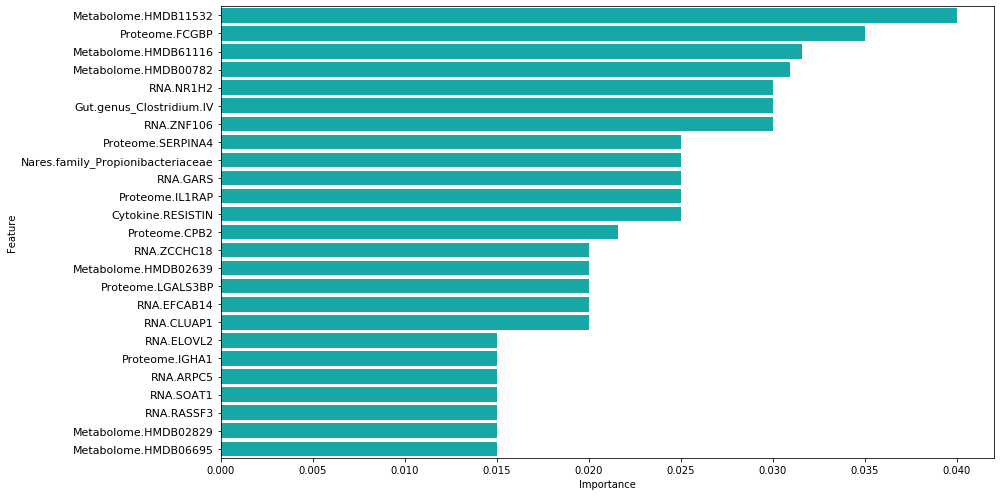

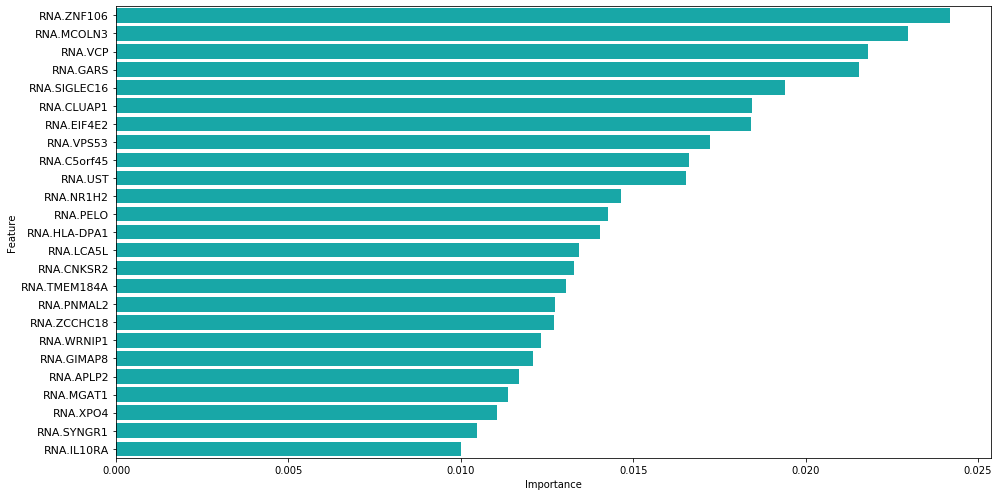

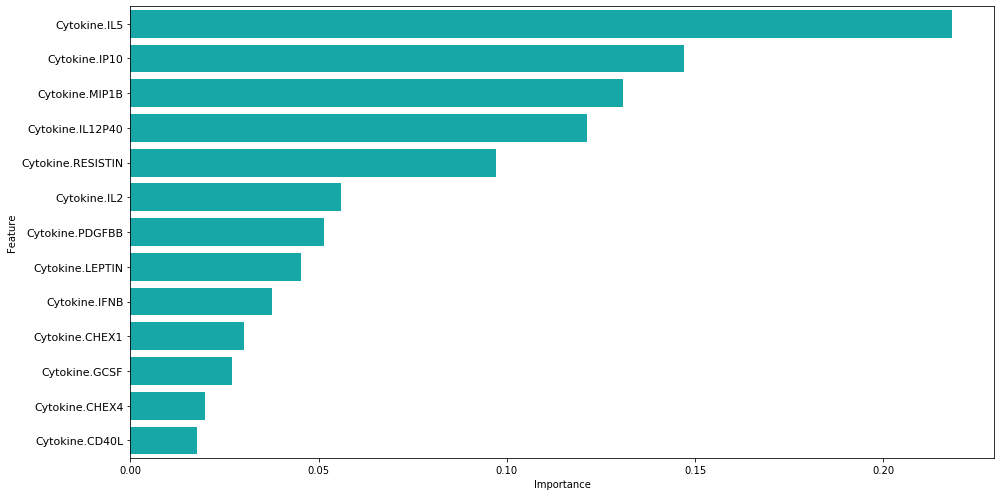

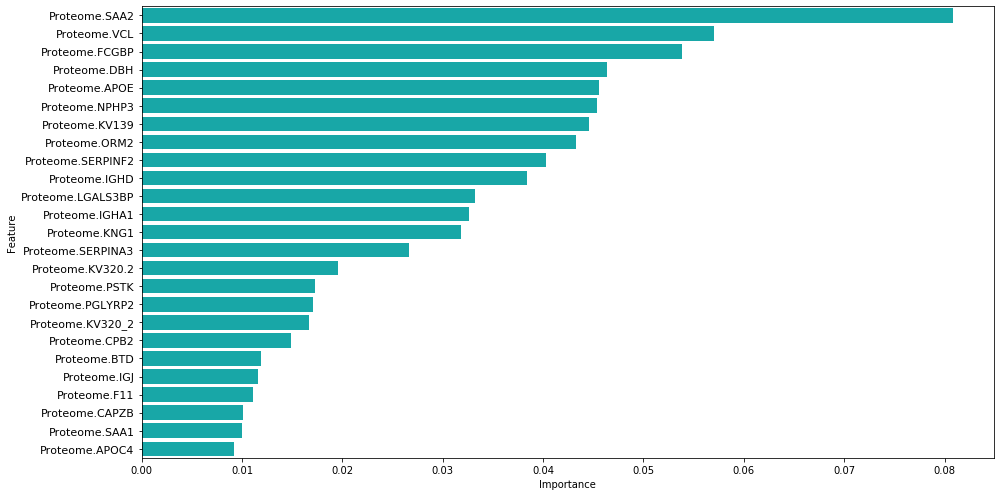

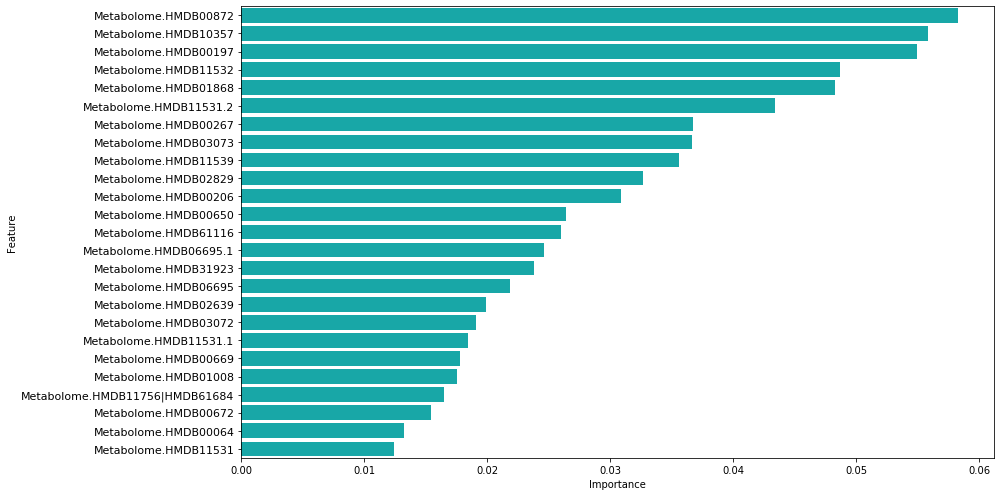

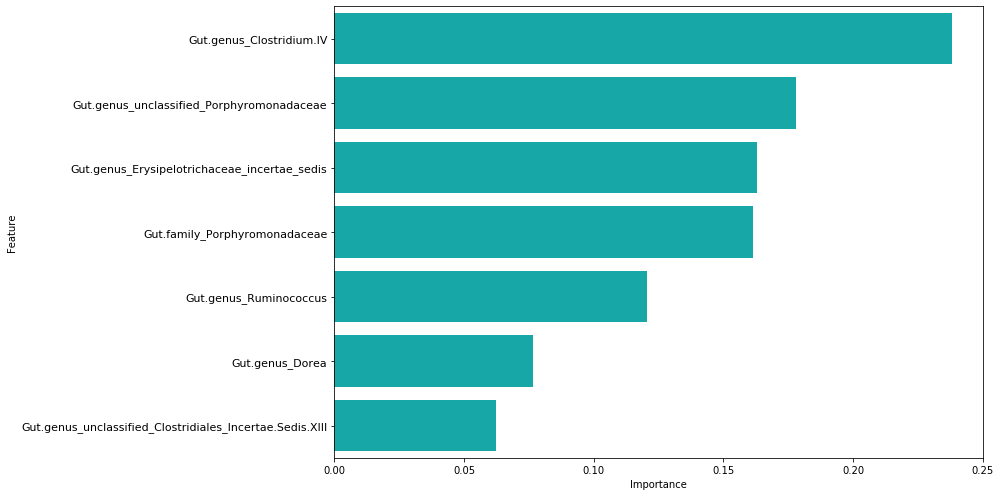

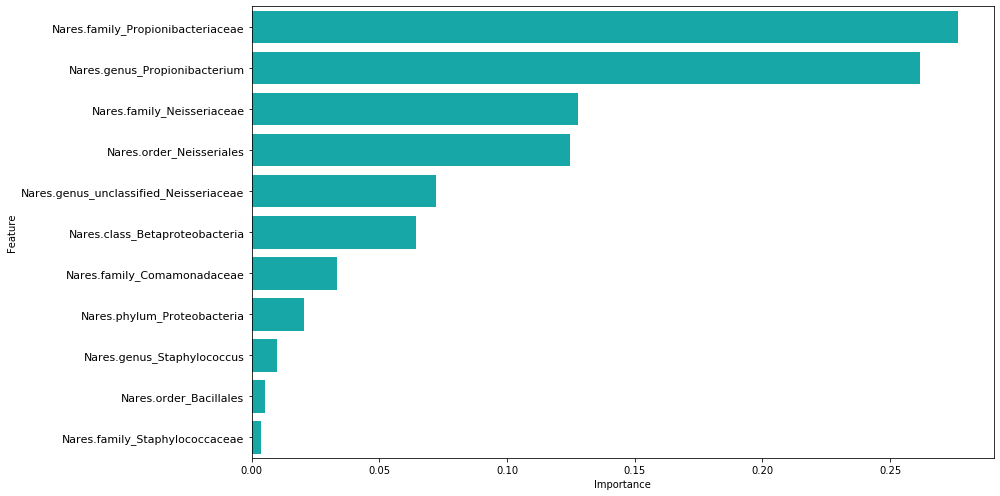

In [17]:
# from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.rcParams["figure.figsize"] = (14, 7)
# plot_importance(booster=est,max_num_features=25)
sns.barplot(x=feat_imp['Importance'], y=feat_imp['Feature'][1:26], color="c")
plt.yticks(size=11)
plt.tight_layout()
plt.savefig('./LGB_feature_importance.png')
plt.show()

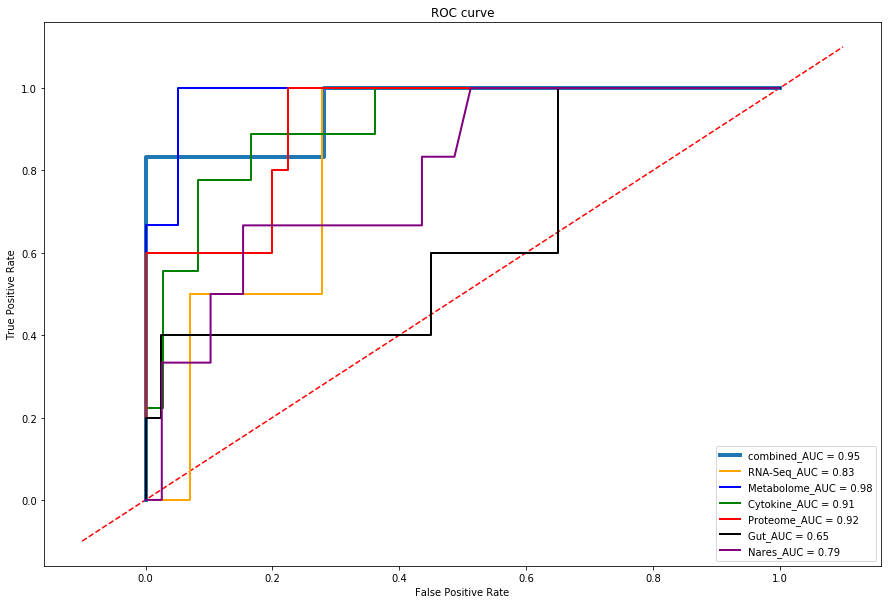

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) # fpr: false positive rate, tpr: true positive rate
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig.set_size_inches(15, 10)
plt.plot([-0.1, 1.1], [-0.1, 1.1],'r--')
plt.plot(fpr, tpr, label = 'combined_AUC = %0.2f' % roc_auc,linewidth=4)
plt.plot(fpr_RNA, tpr_RNA,color='orange',linewidth=2, label = 'RNA-Seq_AUC = %0.2f' % roc_auc_RNA)
plt.plot(fpr_metabolome, tpr_metabolome, color='blue',linewidth=2, label = 'Metabolome_AUC = %0.2f' % roc_auc_metabolome)
plt.plot(fpr_Cytokine, tpr_Cytokine,color='green',linewidth=2, label = 'Cytokine_AUC = %0.2f' % roc_auc_Cytokine)
plt.plot(fpr_proteome, tpr_proteome,color='red',linewidth=2, label = 'Proteome_AUC = %0.2f' % roc_auc_proteome)
plt.plot(fpr_gut, tpr_gut,color='black',linewidth=2, label = 'Gut_AUC = %0.2f' % roc_auc_gut)
plt.plot(fpr_nares, tpr_nares,color='purple',linewidth=2, label = 'Nares_AUC = %0.2f' % roc_auc_nares)
plt.legend(loc = 'lower right')
# plt.xlim([-0.1, 1.1])
# plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.savefig('./combinedROC.png')
plt.show()